In [1]:
import numpy
import pandas
import matplotlib
import seaborn
import tensorflow
import keras

Using TensorFlow backend.


In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_row', None)
import matplotlib.pyplot as plt
plt.rcdefaults()
from pylab import rcParams
import seaborn as sns
%matplotlib inline

####### Deep learning libraries
import tensorflow as tf
import keras
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
# ANN Visualizer is a great visualization python library used to work with Keras. 
# It uses python’s graphviz library to create a presentable graph of the neural network 
# you are building.
from ann_visualizer.visualize import ann_viz
# 
from sklearn.preprocessing import  StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import (confusion_matrix, classification_report, accuracy_score, roc_auc_score, auc,
                             precision_score, recall_score, roc_curve, precision_recall_curve,
                             precision_recall_fscore_support, f1_score,
                             precision_recall_fscore_support)
#
from IPython.display import display, Math, Latex

In [3]:

x_train_o = pd.read_csv('financial_data.csv')
y_train_o = pd.read_csv('revealed_businesses.csv')
# unlabelled test data
x_test_o = pd.read_csv("testing_data.csv")

x_test_business_id = x_test_o['Var1']

# replace missing values
x_train_o.replace('?', np.nan, inplace=True)
x_train_o = x_train_o.astype('float64')
x_train_o = x_train_o.fillna(x_train_o.mean())

x_test_o.replace('?', np.nan, inplace=True)
x_test_o = x_test_o.astype('float64')
x_test_o = x_test_o.fillna(x_train_o.mean())

data_all = x_train_o.merge(y_train_o, on='Var1', how = 'left')
data_all_id = data_all['Var1']

In [4]:
print(x_train_o.shape)
print(y_train_o.shape)
print(x_test_o.shape)
print(data_all.shape)

(9003, 65)
(4879, 2)
(1500, 65)
(9003, 66)


In [5]:
data_all.head()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,Var11,Var12,Var13,Var14,Var15,Var16,Var17,Var18,Var19,Var20,Var21,Var22,Var23,Var24,Var25,Var26,Var27,Var28,Var29,Var30,Var31,Var32,Var33,Var34,Var35,Var36,Var37,Var38,Var39,Var40,Var41,Var42,Var43,Var44,Var45,Var46,Var47,Var48,Var49,Var50,Var51,Var52,Var53,Var54,Var55,Var56,Var57,Var58,Var59,Var60,Var61,Var62,Var63,Var64,Var65,Var66
0,18399.0,0.023954,0.150120,0.395670,3.63570,54.043,0.028822,0.031029,4.56831,1.01120,0.68579,0.031029,0.206700,0.046350,0.031029,748.92,0.487370,6.6614,0.031029,0.019658,38.335,1.10510,0.027054,0.015169,0.045436,0.68579,0.440170,0.17331,0.871110,3.9905,0.027224,0.019658,35.100,10.3990,0.18022,0.027054,1.61780,81.138963,0.68579,0.017139,0.72617,0.071334,0.017139,101.000,62.663,0.144430,2.53140,38.763,-0.015080,-0.009553,3.6357,0.150120,0.096165,1.50990,1.50990,3871.001,0.011041,0.034914,0.98896,0.000000,9.5214,5.8248,34.713,10.5150,3.4752,0.0
1,15092.0,0.049699,0.065808,0.726800,12.94400,233.110,0.000000,0.063192,14.19601,0.89618,0.93419,0.064611,1.038500,0.079257,0.063192,338.17,1.079300,15.1960,0.063192,0.070513,72.291,0.59206,0.038997,0.055445,0.633790,0.88395,0.874140,27.47900,3.422700,4.0807,-0.508100,0.070514,26.353,13.8500,12.80700,0.053381,0.89618,81.138963,0.93419,0.059565,8.70660,0.046838,0.043515,105.020,32.729,0.279950,10.02700,76.870,0.031161,0.034771,11.9690,0.060851,0.072201,4.39940,4.39940,8751.901,0.059565,0.053189,0.93169,0.000000,5.0492,11.1520,24.784,14.7270,4.2204,NaN
2,19821.0,-0.356310,0.392880,0.158840,1.40430,-2.619,-0.085597,-0.356320,1.54531,0.92963,0.60712,-0.355270,-0.906940,-0.270190,-0.356320,-570.91,-0.639330,2.5453,-0.356320,-0.383290,65.049,3.72560,-0.355270,-0.383290,-0.424140,-0.13646,-0.639330,-337.82000,0.354320,2.4509,0.071085,-0.382270,131.530,2.7750,2.77500,-0.160620,0.92963,81.138963,0.60712,-0.172770,0.83263,-0.052357,-0.382160,88.182,23.132,-2.150700,0.98259,55.466,-0.460410,-0.495260,1.4043,0.392880,0.360360,1.35430,1.35430,44.859,-0.172770,-0.586910,1.38330,0.000000,5.6112,15.7790,154.260,2.3662,2.0738,0.0
3,14171.0,0.001417,0.708110,-0.052312,0.88978,-31.198,0.269520,0.001407,0.41222,1.96540,0.29189,0.031043,0.002964,0.019329,0.001407,6803.70,0.053647,1.4122,0.001407,0.000716,21.344,0.79908,0.030593,0.000716,0.099538,0.27613,0.053647,1.03230,-0.090556,3.8024,0.329700,0.000716,88.100,4.1430,2.77700,-0.001052,1.96540,1.412700,0.50949,-0.000535,0.12667,0.351380,0.015566,67.266,45.922,0.012242,0.64765,21.332,-0.005988,-0.003047,0.5964,0.474630,0.241370,0.50528,0.88196,-331.879,-0.000535,0.004820,0.99930,0.745480,17.1011,7.9482,88.147,4.1408,3.4021,NaN
4,12900.0,0.020041,0.346520,0.335930,2.76130,39.050,0.000000,0.020031,1.88591,1.29750,0.65348,0.020867,0.105030,0.093182,0.020031,1046.10,0.348920,2.8859,0.020031,0.015438,37.371,0.79278,0.010807,0.015438,0.322610,0.60721,0.348920,12.92600,0.709690,5.0555,0.191060,0.031723,68.121,5.3581,2.94910,0.098042,1.29750,699.160000,0.65405,0.075560,1.05800,0.103420,0.008329,91.389,54.018,0.150780,2.06480,47.450,-0.090068,-0.069415,1.5198,0.190720,0.186630,1.38060,1.38170,38170.001,0.212410,0.030652,0.80158,0.000862,9.7670,6.7570,53.651,6.8032,2.7412,NaN


In [6]:
data_all_y = data_all.Var66

In [7]:
data_nolabel = data_all[data_all.Var66.isnull()]
data_label = data_all[data_all.Var66.notnull()]

# data_nolabel_v = data_nolabel.drop(columns=['Var1', 'Var66'])
# data_nolabel_v_f = data_nolabel_v.fillna(data_nolabel_v.mean())
# data_nolabel_id = data_nolabel['Var1']

# data_label_v = data_label.drop(columns=['Var1', 'Var66'])
# data_label_v_f = data_label_v.fillna(data_label_v.mean())
# data_label_id = data_label['Var1']

In [8]:
data_label.head()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,Var11,Var12,Var13,Var14,Var15,Var16,Var17,Var18,Var19,Var20,Var21,Var22,Var23,Var24,Var25,Var26,Var27,Var28,Var29,Var30,Var31,Var32,Var33,Var34,Var35,Var36,Var37,Var38,Var39,Var40,Var41,Var42,Var43,Var44,Var45,Var46,Var47,Var48,Var49,Var50,Var51,Var52,Var53,Var54,Var55,Var56,Var57,Var58,Var59,Var60,Var61,Var62,Var63,Var64,Var65,Var66
0,18399.0,0.023954,0.150120,0.39567,3.63570,54.043,0.028822,0.031029,4.56831,1.01120,0.68579,0.031029,0.206700,0.046350,0.031029,748.92,0.487370,6.6614,0.031029,0.019658,38.335,1.105100,0.027054,0.015169,0.045436,0.685790,0.440170,0.173310,0.87111,3.9905,0.027224,0.019658,35.100,10.3990,0.18022,0.027054,1.61780,81.138963,0.68579,0.017139,0.726170,0.071334,0.017139,101.000,62.663,0.14443,2.53140,38.763,-0.015080,-0.009553,3.63570,0.150120,0.096165,1.50990,1.50990,3871.001,0.011041,0.034914,0.98896,0.000000,9.5214,5.8248,34.713,10.5150,3.4752,0.0
2,19821.0,-0.356310,0.392880,0.15884,1.40430,-2.619,-0.085597,-0.356320,1.54531,0.92963,0.60712,-0.355270,-0.906940,-0.270190,-0.356320,-570.91,-0.639330,2.5453,-0.356320,-0.383290,65.049,3.725600,-0.355270,-0.383290,-0.424140,-0.136460,-0.639330,-337.820000,0.35432,2.4509,0.071085,-0.382270,131.530,2.7750,2.77500,-0.160620,0.92963,81.138963,0.60712,-0.172770,0.832630,-0.052357,-0.382160,88.182,23.132,-2.15070,0.98259,55.466,-0.460410,-0.495260,1.40430,0.392880,0.360360,1.35430,1.35430,44.859,-0.172770,-0.586910,1.38330,0.000000,5.6112,15.7790,154.260,2.3662,2.0738,0.0
6,17769.0,0.004100,0.723040,-0.47065,0.34907,-169.230,0.000000,0.004090,0.38306,1.10920,0.27696,0.010579,0.005656,0.063799,0.004090,3729.20,0.097876,1.3830,0.004090,0.003687,22.961,5.178332,0.010259,0.003687,0.004090,0.033122,0.097876,1.580900,-0.62954,3.4887,0.646240,0.003687,216.970,1.6822,1.68220,-0.107090,1.10920,81.138963,0.27696,-0.096541,0.008587,0.313260,0.009249,81.008,58.047,0.05861,0.25256,20.939,-0.056420,-0.050864,0.34907,0.723040,0.594450,0.37046,0.37046,-1450.199,-0.096542,0.014766,0.99667,0.000000,15.8971,6.2881,237.920,1.5341,1.4837,0.0
7,19309.0,0.024596,0.084252,0.38657,5.58830,44.886,0.174290,0.028695,10.19801,1.00690,0.85916,0.028695,0.340580,0.039180,0.028695,324.74,1.124000,11.8690,0.028695,0.011872,13.956,1.402400,0.021655,0.010172,0.220620,0.859160,1.075200,0.090212,0.73052,4.4411,-0.054839,0.011872,12.811,28.4920,0.25703,0.021655,2.44590,81.138963,0.85916,0.008960,2.609800,0.031600,0.008960,37.896,23.940,0.26603,4.49140,14.052,-0.044346,-0.018348,5.58830,0.084252,0.035098,1.62360,1.62360,10674.001,0.006825,0.028616,0.99317,0.000000,26.1531,15.2470,12.723,28.6870,4.5674,0.0
9,20728.0,0.036710,0.416930,0.13777,1.37330,-18.123,0.037957,0.050825,1.28881,0.99111,0.53736,0.050825,0.137720,0.095423,0.050825,996.79,0.366180,2.3985,0.050825,0.031767,47.458,1.014000,-0.030511,0.022938,0.052083,0.537360,0.332300,-0.189010,0.27935,5.0231,0.258610,0.031767,83.443,4.3743,-0.07318,-0.030511,1.69090,6.238700,0.58525,-0.019070,0.024573,0.192160,-0.019070,113.550,66.095,0.17642,0.80964,47.036,-0.132360,-0.082726,1.21560,0.369040,0.228610,1.08960,1.18670,14531.001,-0.008967,0.068297,1.00900,0.089127,7.6912,5.5223,84.191,4.3354,3.2441,0.0


In [9]:
data_label.Var66.value_counts()

0.0    4709
1.0     170
Name: Var66, dtype: int64

In [10]:
data_label.columns

Index(['Var1', 'Var2', 'Var3', 'Var4', 'Var5', 'Var6', 'Var7', 'Var8', 'Var9',
       'Var10', 'Var11', 'Var12', 'Var13', 'Var14', 'Var15', 'Var16', 'Var17',
       'Var18', 'Var19', 'Var20', 'Var21', 'Var22', 'Var23', 'Var24', 'Var25',
       'Var26', 'Var27', 'Var28', 'Var29', 'Var30', 'Var31', 'Var32', 'Var33',
       'Var34', 'Var35', 'Var36', 'Var37', 'Var38', 'Var39', 'Var40', 'Var41',
       'Var42', 'Var43', 'Var44', 'Var45', 'Var46', 'Var47', 'Var48', 'Var49',
       'Var50', 'Var51', 'Var52', 'Var53', 'Var54', 'Var55', 'Var56', 'Var57',
       'Var58', 'Var59', 'Var60', 'Var61', 'Var62', 'Var63', 'Var64', 'Var65',
       'Var66'],
      dtype='object')

In [11]:
numerical_cols = ['Var2', 'Var3', 'Var4', 'Var5', 'Var6', 'Var7', 'Var8', 'Var9',
       'Var10', 'Var11', 'Var12', 'Var13', 'Var14', 'Var15', 'Var16', 'Var17',
       'Var18', 'Var19', 'Var20', 'Var21', 'Var22', 'Var23', 'Var24', 'Var25',
       'Var26', 'Var27', 'Var28', 'Var29', 'Var30', 'Var31', 'Var32', 'Var33',
       'Var34', 'Var35', 'Var36', 'Var37', 'Var38', 'Var39', 'Var40', 'Var41',
       'Var42', 'Var43', 'Var44', 'Var45', 'Var46', 'Var47', 'Var48', 'Var49',
       'Var50', 'Var51', 'Var52', 'Var53', 'Var54', 'Var55', 'Var56', 'Var57',
       'Var58', 'Var59', 'Var60', 'Var61', 'Var62', 'Var63', 'Var64', 'Var65']

In [12]:
labels = data_label.Var66.astype(int)
# labels[labels != 0] = 1
# len(labels[labels !=0])
labels.value_counts().tolist()

[4709, 170]

Text(0.5, 1.0, 'Data per Label')

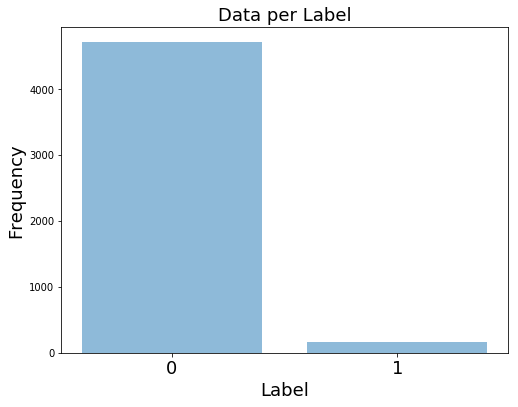

In [13]:
plt.figure(figsize=(8,6))
objects = tuple(['0', '1']) 
y_pos = np.arange(len(objects))
x   = np.arange(len(objects))
y   = labels.value_counts().tolist()
#plt.ylim([0, 1.2])
plt.bar(x, y, align='center', alpha=0.5)
plt.xticks(y_pos, objects,fontsize=18)
plt.xlabel('Label', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.title('Data per Label',fontsize=18)

In [14]:
# RANDOM_SEED = 101

# X_train, X_test = train_test_split(data_label, test_size=0.2, random_state = RANDOM_SEED)

# X_train = X_train[X_train['Var66'] == 0]
# X_train = X_train.drop(['Var1','Var66'], axis=1)
# y_test  = X_test['Var66']
# X_test  = X_test.drop(['Var1','Var66'], axis=1)

In [15]:
X_train = data_label[data_label['Var66'] == 0]
X_train = X_train.drop(['Var1','Var66'], axis=1)

# all the labelled data
y_test = data_label['Var66']
X_test = data_label
X_test  = X_test.drop(['Var1','Var66'], axis=1)

In [16]:
X_train = X_train.values
X_test  = X_test.values
# y_test = y_test.values
print('Training data size   :', X_train.shape)
print('Validation data size :', X_test.shape)

Training data size   : (4709, 64)
Validation data size : (4879, 64)


In [17]:
scaler = MinMaxScaler()
#scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [18]:
# # is nan?
# LL = len(X_train_scaled)
# for i in range(LL):
#     for j in range(64):
#        if np.isnan(X_train_scaled[i,j]) == True:
#         print('NAN!!')
#         print('i%d,j%d:'%(i,j))

In [19]:
print('*'*50)
print('start cluster based detecion...')
print('*'*50)

**************************************************
start cluster based detecion...
**************************************************


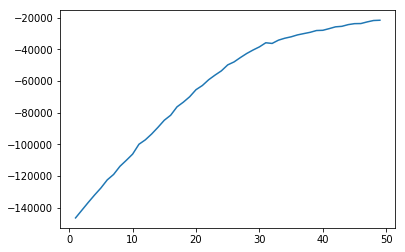

In [20]:

from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.covariance import EllipticEnvelope

data = X_test_scaled
label = y_test.values

# Take useful feature and standardize them
# data = df[['value', 'hours', 'daylight', 'DayOfTheWeek', 'WeekDay']]
# min_max_scaler = preprocessing.StandardScaler()
# np_scaled = min_max_scaler.fit_transform(data)
# data = pd.DataFrame(np_scaled)

# reduce to 30 importants features
pca = PCA(n_components=30)
X_pca = pca.fit_transform(data)
# standardize these 30 new features
min_max_scaler = preprocessing.StandardScaler()
np_scaled = min_max_scaler.fit_transform(X_pca)
X_pca_scaled = pd.DataFrame(np_scaled)
# clustering
#  calculate with different number of centroids to see the loss plot (elbow method)
n_cluster = range(1, 50)
kmeans = [KMeans(n_clusters=i).fit(X_pca_scaled) for i in n_cluster]
scores = [kmeans[i].score(X_pca_scaled) for i in range(len(kmeans))]
fig, ax = plt.subplots()
ax.plot(n_cluster, scores)
plt.show()

In [28]:
# Not clear for me, I choose 30 centroids arbitrarily and add these data to the central dataframe

Dict = {
        'cluster':kmeans[29].predict(X_pca_scaled),
        'label':y_test.values,
                 'principal_feature1':X_pca_scaled[0],
                 'principal_feature2':X_pca_scaled[1],
                 'principal_feature3':X_pca_scaled[2],
                 'principal_feature4':X_pca_scaled[3],
                 'principal_feature5':X_pca_scaled[4],
                 'principal_feature6':X_pca_scaled[5],
                 'principal_feature7':X_pca_scaled[6],
                 'principal_feature8':X_pca_scaled[7],
                 'principal_feature9':X_pca_scaled[8],
                 'principal_feature10':X_pca_scaled[9],
                 'principal_feature11':X_pca_scaled[10],
                 'principal_feature12':X_pca_scaled[11],
                 'principal_feature13':X_pca_scaled[12],
                 'principal_feature14':X_pca_scaled[13],
                 'principal_feature15':X_pca_scaled[14],
                 'principal_feature16':X_pca_scaled[15],
                 'principal_feature17':X_pca_scaled[16],
                 'principal_feature18':X_pca_scaled[17],
                 'principal_feature19':X_pca_scaled[18],
                 'principal_feature20':X_pca_scaled[19],
                 'principal_feature21':X_pca_scaled[20],
                 'principal_feature22':X_pca_scaled[21],
                 'principal_feature23':X_pca_scaled[22],
                 'principal_feature24':X_pca_scaled[23],
                 'principal_feature25':X_pca_scaled[24],
                 'principal_feature26':X_pca_scaled[25],
                 'principal_feature27':X_pca_scaled[26],
                 'principal_feature28':X_pca_scaled[27],
                 'principal_feature29':X_pca_scaled[28],
                 'principal_feature30':X_pca_scaled[29]
       }

# print(Dict)
df = pd.DataFrame(data=Dict)

# df['cluster'] = kmeans[29].predict(X_train_pca_scaled)
# df['principal_feature1'] = X_train_pca_scaled[0]
# df['principal_feature2'] = X_train_pca_scaled[1]
df['cluster'].value_counts()

0     1629
15    1538
28    1394
1      256
29       8
22       8
26       6
19       5
21       4
27       4
23       3
16       3
9        3
6        2
14       1
11       1
4        1
8        1
12       1
20       1
24       1
5        1
7        1
10       1
13       1
17       1
3        1
18       1
2        1
25       1
Name: cluster, dtype: int64

In [29]:
# print(Dict)

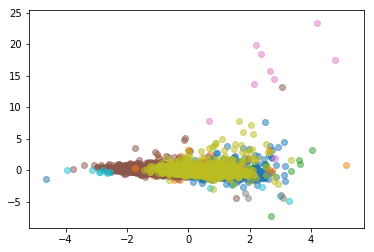

In [30]:
#plot the different clusters with the 2 main features
fig, ax = plt.subplots()
# colors = {0:'red', 1:'blue', 2:'green', 3:'pink', 4:'black', 5:'orange', 6:'cyan', 7:'yellow', 8:'brown', 
#           9:'purple', 10:'white', 11: 'grey', 12:'lightblue', 13:'lightgreen', 14: 'darkgrey',15: 'lightgrey',
#          15:'violet', 17:'fochsia', 18:'magenta', 19:'oliverdrab', 20:'yellowgreen', 21:'coral', 22:'lightcoral', 
#           23:'gold', 24:'skyblue', 25:'hotpink', 26:'blueviolet', 27: 'navy', 28:'plum', 29:'lightcora'}
# ax.scatter(df['principal_feature1'], df['principal_feature2'], c=df["cluster"].apply(lambda x: colors[x]))

# ax.scatter(df['principal_feature1'], df['principal_feature2'], c=df["cluster"].apply(lambda x: colors[x]))
for i in range(30):
    dff = df[df['cluster'] == i]
#     ll = len(dff)
#     colors = np.random.rand(ll)
    ax.scatter(dff['principal_feature1'], dff['principal_feature2'], alpha=0.5)
plt.show()

In [31]:
# def getDistanceByPoint(data, model):
#     distance = pd.Series()
#     for i in range(0,len(data)):
#         Xa = np.array(data.loc[i])
#         Xb = model.cluster_centers_[model.labels_[i]-1]
#         distance.set_value(i, np.linalg.norm(Xa-Xb))
#     return distance
# # get the distance between each point and its nearest centroid. 
# # The biggest distances are considered as anomaly
# outliers_fraction = 0.01
# distance = getDistanceByPoint(X_train_pca_scaled, kmeans[29])
# number_of_outliers = int(outliers_fraction*len(distance))
# threshold = distance.nlargest(number_of_outliers).min()
# # anomaly21 contain the anomaly result of method 2.1 Cluster (0:normal, 1:anomaly) 
# df['anomaly21'] = (distance >= threshold).astype(int)

In [32]:
def AE_AD(X, dim, epoch, baq_siz):
    """
    autoencoder for anomaly detection
    based on outlier detection
    X -- Input data
    dim -- encoding dimension
    epoch -- iteration epoch
    baq_siz -- bath size
    """
    input_dim = X.shape[1]

    encoding_dim = dim
    
    input_layer = Input(shape=(input_dim, ))
    encoder = Dense(encoding_dim, activation="tanh",activity_regularizer=regularizers.l1(10e-5))(input_layer)
    encoder = Dense(int(encoding_dim/2), activation="tanh")(encoder)
    encoder = Dense(int(encoding_dim/4), activation="tanh")(encoder)
    encoder = Dense(int(1), activation="tanh")(encoder)
    decoder = Dense(int(encoding_dim/4), activation='tanh')(encoder)
    decoder = Dense(int(encoding_dim/2), activation='tanh')(encoder)
    decoder = Dense(int(encoding_dim), activation='tanh')(decoder)
    decoder = Dense(input_dim, activation='tanh')(decoder)
    autoencoder = Model(inputs=input_layer, outputs=decoder)
    
    nb_epoch = epoch
    batch_size = baq_siz
    autoencoder.compile(optimizer='adam', loss='mse' )

    history = autoencoder.fit(X, X,
                            epochs=nb_epoch,
                            batch_size=batch_size,
                            shuffle=True,
                            validation_split=0.1,
                            verbose=0
                            ).history
    
    predictions = autoencoder.predict(X)
    # np.power: First array elements raised to powers from second array, element-wise
    mse = np.mean(np.power(X - predictions, 2), axis=1)
    
    return mse

for k in range(30):
    label = df[df['cluster'] == k]['label'].values
    dff = df[df['cluster'] == k].drop(columns=['cluster', 'label'])
    
#     note that the PC dimension is 30 at previous step

    if len(dff)<5:
        pre_label = np.ones([len(dff),])
        #label = dff['label'].values
        pre = precision_score(label, pre_label, average='binary')
        rec = recall_score(label, pre_label, average='binary')
        f1 = f1_score(label, pre_label, average='binary')

        print('cluster %d'%k,[pre, rec, f1])

    else:
        mse = AE_AD(dff.values, 20, 100, 50)
        #label = dff['label'].values
#         df_error = pd.DataFrame({'reconstruction_error': mse, 'Label': label}, index=y_test.index)
        
        
        # search to find the best threshold
        LH = len(mse)
        mx = np.max(mse)
        mi = np.min(mse)
        print(mx)
        print(mi)

        pre_label =  np.empty([100, LH])
        T = np.zeros([100, 5])

        for i in range(100):
            T[i, 0] = mi + ((mx-mi)/100)*i
            for j in range(LH):
                if mse[j] > T[i, 0]:
                    pre_label[i,j] = 1
                else:
                    pre_label[i,j] = 0  
            T[i, 1] = accuracy_score(label, pre_label[i, :])
            precision, recall, f1, _ = precision_recall_fscore_support(label, pre_label[i, :], average='binary')
            T[i, 2] = precision#precision_score(label, pre_label[i, :], average='binary')
            T[i, 3] = recall#recall_score(label, pre_label[i, :], average='binary')
            T[i, 4] = f1#f1_score(label, pre_label[i, :], average='binary')
        print('cluster %d'%k,np.max(T[:,2:5], axis=0))


27.82691478664193
0.005581283292450755
cluster 0 [0.25       1.         0.06190476]
20.899191390435224
0.015093333874855027
cluster 1 [1.         1.         0.14285714]
cluster 2 [0.0, 0.0, 0.0]
cluster 3 [0.0, 0.0, 0.0]
cluster 4 [0.0, 0.0, 0.0]
cluster 5 [0.0, 0.0, 0.0]
cluster 6 [0.0, 0.0, 0.0]
cluster 7 [0.0, 0.0, 0.0]
cluster 8 [0.0, 0.0, 0.0]
cluster 9 [0.3333333333333333, 1.0, 0.5]
cluster 10 [0.0, 0.0, 0.0]
cluster 11 [0.0, 0.0, 0.0]
cluster 12 [0.0, 0.0, 0.0]
cluster 13 [0.0, 0.0, 0.0]
cluster 14 [0.0, 0.0, 0.0]


/home/superchee/anaconda3/envs/CS5228/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
/home/superchee/anaconda3/envs/CS5228/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
/home/superchee/anaconda3/envs/CS5228/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
/home/superchee/anaconda3/envs/CS5228/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
/home/superchee/anaconda3/envs/CS5228/lib/python3.6/si

15.215263448921982
0.002152012852615055
cluster 15 [0.33333333 1.         0.06423174]
cluster 16 [0.0, 0.0, 0.0]
cluster 17 [0.0, 0.0, 0.0]
cluster 18 [0.0, 0.0, 0.0]


/home/superchee/anaconda3/envs/CS5228/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
/home/superchee/anaconda3/envs/CS5228/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
/home/superchee/anaconda3/envs/CS5228/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
/home/superchee/anaconda3/envs/CS5228/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
/home/superchee/anaconda3/envs/CS5228/lib/python3.6/si

35.01570890483112
11.228942087972912
cluster 19 [0.5        1.         0.66666667]
cluster 20 [0.0, 0.0, 0.0]
cluster 21 [0.0, 0.0, 0.0]


/home/superchee/anaconda3/envs/CS5228/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
/home/superchee/anaconda3/envs/CS5228/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
/home/superchee/anaconda3/envs/CS5228/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
/home/superchee/anaconda3/envs/CS5228/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


67.58025268082791
1.6617440251355164
cluster 22 [0.14285714 1.         0.25      ]
cluster 23 [0.0, 0.0, 0.0]
cluster 24 [0.0, 0.0, 0.0]
cluster 25 [0.0, 0.0, 0.0]


/home/superchee/anaconda3/envs/CS5228/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
/home/superchee/anaconda3/envs/CS5228/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
/home/superchee/anaconda3/envs/CS5228/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
/home/superchee/anaconda3/envs/CS5228/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
/home/superchee/anaconda3/envs/CS5228/lib/python3.6/si

35.80795589061561
7.967465840974169
cluster 26 [0. 0. 0.]
cluster 27 [0.0, 0.0, 0.0]


/home/superchee/anaconda3/envs/CS5228/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
/home/superchee/anaconda3/envs/CS5228/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
/home/superchee/anaconda3/envs/CS5228/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
/home/superchee/anaconda3/envs/CS5228/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
/hom

18.862695013967933
0.0033796309163428386
cluster 28 [0.08247423 1.         0.10810811]
67.07942876387281
2.612113877519846
cluster 29 [0. 0. 0.]


/home/superchee/anaconda3/envs/CS5228/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
/home/superchee/anaconda3/envs/CS5228/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
/home/superchee/anaconda3/envs/CS5228/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
/home/superchee/anaconda3/envs/CS5228/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
/hom

In [ ]:
print('*'*50)
print('end cluster based detecion...')
print('*'*50)

In [ ]:
label_test = df[df.cluster == 1]['label'].values

In [ ]:
len(df[df.cluster == 1])